In [11]:
import pandas as pd


In [12]:
df=pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [13]:
df1=df.reset_index()['close']
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

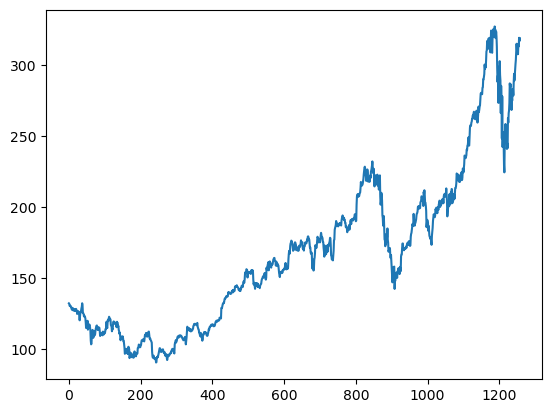

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np


In [16]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [19]:
## Splitting dataset into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data ,test_data= df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(817, 441)

In [22]:
import numpy 
def create_dataset(dataset,time_step=1):
    data_X,data_y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        data_X.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_X),numpy.array(data_y)

In [23]:
time_step=100
X_train ,y_train=create_dataset(train_data,time_step)
X_test ,y_test=create_dataset(test_data,time_step)

In [24]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

###  Create Stacked LSTM Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test),verbose=1)


Epoch 1/100
12/12 [==============================] - 10s 367ms/step - loss: 0.0168 - val_loss: 0.0627
Epoch 2/100
12/12 [==============================] - 3s 278ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 4/100
12/12 [==============================] - 3s 243ms/step - loss: 8.6103e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 3s 254ms/step - loss: 7.2082e-04 - val_loss: 0.0048
Epoch 6/100
12/12 [==============================] - 3s 245ms/step - loss: 6.0189e-04 - val_loss: 0.0040
Epoch 7/100
12/12 [==============================] - 3s 251ms/step - loss: 5.9582e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 3s 256ms/step - loss: 5.7710e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 3s 246ms/step - loss: 6.0941e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 3s 248ms/ste

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.10.0'

In [32]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)


11/11 [==============================] - 1s 56ms/step


In [33]:
train_predict=scalar.inverse_transform(train_pred)
test_predict=scalar.inverse_transform(test_pred)

In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

142.40888428715715

In [36]:
math.sqrt(mean_squared_error(y_test, test_predict))

239.01294661177897

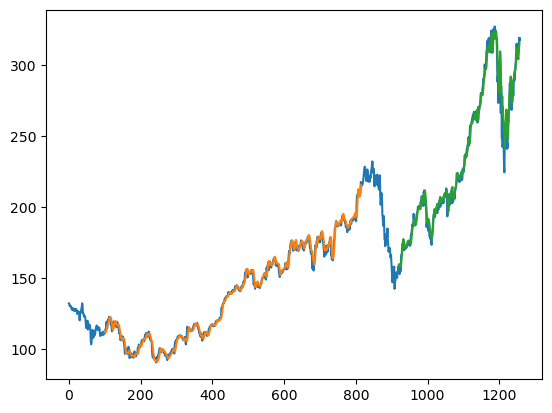

In [37]:
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()